<a href="https://colab.research.google.com/github/scoffin5/scoffin5.github.io/blob/main/BIA_3733_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
import io
nfl = pd.read_csv(io.BytesIO(uploaded['nfl_pass_rush_receive_raw_data.csv']))
nfl

In [ ]:
nfl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6330 entries, 0 to 6329
Data columns (total 69 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   game_id                       6330 non-null   object 
 1   player_id                     6330 non-null   object 
 2   pos                           6330 non-null   object 
 3   player                        6330 non-null   object 
 4   team                          6330 non-null   object 
 5   pass_cmp                      6330 non-null   int64  
 6   pass_att                      6330 non-null   int64  
 7   pass_yds                      6330 non-null   int64  
 8   pass_td                       6330 non-null   int64  
 9   pass_int                      6330 non-null   int64  
 10  pass_sacked                   6330 non-null   int64  
 11  pass_sacked_yds               6330 non-null   int64  
 12  pass_long                     6330 non-null   int64  
 13  pas

In [ ]:
nfl = nfl.assign(RushAvg=lambda x: (x['rush_yds'] / x['rush_att']))
nfl['RushAvg']

0       2.666667
1       3.000000
2       0.000000
3            NaN
4            NaN
          ...   
6325         NaN
6326         NaN
6327         NaN
6328         NaN
6329         NaN
Name: RushAvg, Length: 6330, dtype: float64

In [ ]:
nfl.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [ ]:
nfl2 = nfl.round(decimals=2)

In [ ]:
nfl2.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
nfl2['rush_broken_tackles']

0       0
1       1
2       0
7       0
9       0
       ..
6314    0
6315    4
6316    1
6317    0
6318    0
Name: rush_broken_tackles, Length: 2139, dtype: int64

In [ ]:
nfl = nfl.assign(Win=lambda x: (x['home_score'] < x['vis_score']))

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

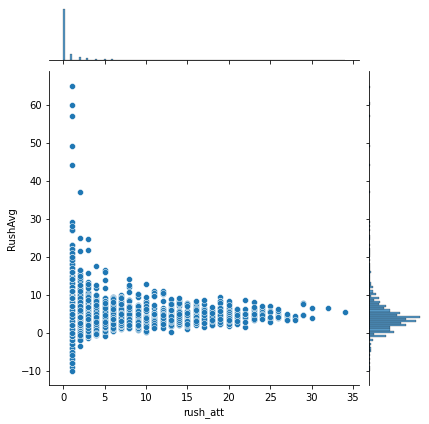

In [ ]:
sns.jointplot(x='rush_att', y = 'RushAvg', data = nfl)

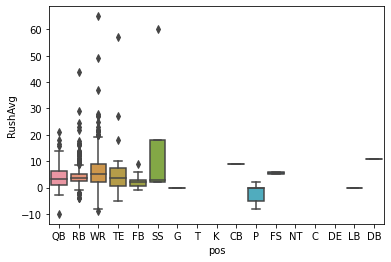

In [ ]:
sns.boxplot(x='pos', y='RushAvg', data = nfl)

In [ ]:
x = nfl2[['vis_score', 'home_score','rush_long']]
y = nfl2['RushAvg']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lm = LinearRegression()

In [ ]:
lm.fit(x_train,y_train)

ValueError: ignored

In [ ]:
lm.coef_

AttributeError: ignored

In [ ]:
cdf = pd.DataFrame(lm.coef_,x_train.columns, columns = ['Coefficents'])
cdf

AttributeError: ignored

In [ ]:
predictions = lm.predict(x_test)
predictions

NotFittedError: ignored

In [ ]:
sns.scatterplot(y_test, predictions)

NameError: ignored